In [1]:
#import basic libraries
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import io
import time
import copy
import json
import sys
import sagemaker.amazon.common as smac
import os
from scipy.spatial.distance import cdist
import numpy as np
from numpy import array
import urllib.request
import gzip
import pickle
import sklearn.cluster
import sklearn
import re
from sagemaker import get_execution_role

!pip install --upgrade pip
!pip install mxnet
import mxnet as mx


Requirement already up-to-date: pip in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (20.2.4)


In [2]:
bucket='deepin'
data_key = 'final2.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
final = pd.read_csv(data_location)
role = get_execution_role()


In [3]:
s3 = boto3.resource('s3')

In [4]:
final.shape

(39862, 32)

In [5]:
final.head()

,startYear,runtimeMinutes,genreAction,genreAdult,genreAdventure,genreAnimation,genreBiography,genreComedy,genreCrime,genreDocumentary,...,genreRomance,genreSci-Fi,genreShort,genreSport,genreTalk-Show,genreThriller,genreWar,genreWestern,averageRating,numVotes
0,1906,70,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,6.1,595
1,1911,71,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.1,2291
2,1919,85,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,6.8,762
3,1913,54,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,7.0,1961
4,1913,96,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.1,964


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(final)

In [8]:
scaled = pd.DataFrame(data=scaled)

In [9]:
scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.000000,0.083179,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.22,0.000041
1,0.043860,0.085028,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.42,0.000778
2,0.114035,0.110906,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.36,0.000114
3,0.061404,0.053604,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.40,0.000634
4,0.061404,0.131238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.42,0.000201


In [12]:
scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,39862.000000,39862.000000,39862.000000,39862.0,39862.000000,39862.000000,39862.000000,39862.000000,39862.000000,39862.000000,...,39862.000000,39862.000000,39862.000000,39862.000000,39862.0,39862.000000,39862.000000,39862.000000,39862.000000,39862.000000
mean,0.780626,0.147059,0.154508,0.0,0.097712,0.030957,0.054087,0.342005,0.155185,0.063042,...,0.184737,0.037856,0.000025,0.019317,0.0,0.127314,0.030380,0.017310,0.317749,0.008539
std,0.205101,0.042240,0.361440,0.0,0.296929,0.173203,0.226191,0.474387,0.362086,0.243042,...,0.388089,0.190849,0.005009,0.137637,0.0,0.333329,0.171632,0.130424,0.161472,0.033872
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.666667,0.121996,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.200000,0.000181
50%,0.859649,0.138632,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.320000,0.000662
75%,0.938596,0.162662,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.440000,0.002952
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
scaled = scaled.astype('float32')

In [ ]:
final = final.astype('float32')

In [15]:
from sagemaker import KMeans
from time import gmtime, strftime
output_time = strftime("%Y-%m-%d-%H-%M-%S", gmtime())
output_folder = 'KMeans-results-v2-' + output_time
K = range(2, 21) # change the range to be used for k
job_names = []

# launching jobs for all k
for k in K:
    print('starting train job for cluster with k:' + str(k))
    output_location = 's3://{}/kmeans_acloudguru/'.format(bucket) + output_folder
    print('training artifacts will be uploaded to: {}'.format(output_location))
    job_name = 'cluster--------k' + str(k)
    #TrainingJobName=job_name 
    kmeans = KMeans(role=role, train_instance_count=1, train_instance_type='ml.c4.xlarge', init_method='kmeans++', 
                output_path=output_location, k=k, eval_metrics=set(['ssd', 'msd']))
    kmeans.fit(kmeans.record_set(scaled.values), job_name=job_name)
    job_names.append(job_name)
    print('end of train job for cluster: ' + str(k))

starting train job for cluster with k:2
training artifacts will be uploaded to: s3://deepin/kmeans_acloudguru/KMeans-results-v2-2020-11-17-15-35-11


's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-11-17 15:35:12 Starting - Starting the training job...
2020-11-17 15:35:15 Starting - Launching requested ML instances......
2020-11-17 15:36:20 Starting - Preparing the instances for training...
2020-11-17 15:37:09 Downloading - Downloading input data......
2020-11-17 15:38:13 Training - Training image download completed. Training in progress.
2020-11-17 15:38:13 Uploading - Uploading generated training model.Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/17/2020 15:38:10 INFO 140033347917632] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd


2020-11-17 15:38:19 Completed - Training job completed
Training seconds: 70
Billable seconds: 70
end of train job for cluster: 2
starting train job for cluster with k:3
training artifacts will be uploaded to: s3://deepin/kmeans_acloudguru/KMeans-results-v2-2020-11-17-15-35-11


's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-11-17 15:38:56 Starting - Starting the training job...
2020-11-17 15:39:00 Starting - Launching requested ML instances......
2020-11-17 15:40:05 Starting - Preparing the instances for training......
2020-11-17 15:41:22 Downloading - Downloading input data...
2020-11-17 15:41:52 Training - Training image download completed. Training in progress.
2020-11-17 15:41:52 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[11/17/2020 15:41:50 INFO 140020454201152] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_


2020-11-17 15:41:59 Completed - Training job completed
Training seconds: 37
Billable seconds: 37
end of train job for cluster: 3
starting train job for cluster with k:4
training artifacts will be uploaded to: s3://deepin/kmeans_acloudguru/KMeans-results-v2-2020-11-17-15-35-11


's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-11-17 15:42:39 Starting - Starting the training job...
2020-11-17 15:42:41 Starting - Launching requested ML instances......
2020-11-17 15:43:47 Starting - Preparing the instances for training......
2020-11-17 15:44:52 Downloading - Downloading input data...
2020-11-17 15:45:33 Training - Downloading the training image...
2020-11-17 15:46:06 Uploading - Uploading generated training model
2020-11-17 15:46:06 Completed - Training job completed
Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/17/2020 15:45:56 INFO 139874543880000] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloy

Training seconds: 74
Billable seconds: 74
end of train job for cluster: 4
starting train job for cluster with k:5
training artifacts will be uploaded to: s3://deepin/kmeans_acloudguru/KMeans-results-v2-2020-11-17-15-35-11


's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-11-17 15:46:22 Starting - Starting the training job...
2020-11-17 15:46:24 Starting - Launching requested ML instances......
2020-11-17 15:47:48 Starting - Preparing the instances for training......
2020-11-17 15:48:38 Downloading - Downloading input data...
2020-11-17 15:49:21 Training - Downloading the training image..Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/17/2020 15:49:38 INFO 140574272677696] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'_disable_wait_to_read': u'false', u'extra_center_factor': u'auto', u'e


2020-11-17 15:49:47 Uploading - Uploading generated training model
2020-11-17 15:49:47 Completed - Training job completed
Training seconds: 69
Billable seconds: 69
end of train job for cluster: 5
starting train job for cluster with k:6
training artifacts will be uploaded to: s3://deepin/kmeans_acloudguru/KMeans-results-v2-2020-11-17-15-35-11


's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-11-17 15:50:04 Starting - Starting the training job...
2020-11-17 15:50:07 Starting - Launching requested ML instances......
2020-11-17 15:51:15 Starting - Preparing the instances for training.........
2020-11-17 15:53:00 Downloading - Downloading input data
2020-11-17 15:53:00 Training - Downloading the training image..Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/17/2020 15:53:18 INFO 139792022406976] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'_disable_wait_to_read': u'false', u'extra_center_factor': u'auto', u'e


2020-11-17 15:53:27 Uploading - Uploading generated training model
2020-11-17 15:53:27 Completed - Training job completed
Training seconds: 39
Billable seconds: 39
end of train job for cluster: 6
starting train job for cluster with k:7
training artifacts will be uploaded to: s3://deepin/kmeans_acloudguru/KMeans-results-v2-2020-11-17-15-35-11


's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-11-17 15:53:47 Starting - Starting the training job...
2020-11-17 15:53:49 Starting - Launching requested ML instances......
2020-11-17 15:55:16 Starting - Preparing the instances for training.........
2020-11-17 15:56:29 Downloading - Downloading input data...
2020-11-17 15:57:19 Training - Training image download completed. Training in progress.
2020-11-17 15:57:19 Uploading - Uploading generated training model.Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/17/2020 15:57:17 INFO 139770894788416] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_ll


2020-11-17 15:57:26 Completed - Training job completed
Training seconds: 57
Billable seconds: 57
end of train job for cluster: 7
starting train job for cluster with k:8
training artifacts will be uploaded to: s3://deepin/kmeans_acloudguru/KMeans-results-v2-2020-11-17-15-35-11


's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-11-17 15:58:01 Starting - Starting the training job...
2020-11-17 15:58:04 Starting - Launching requested ML instances......
2020-11-17 15:59:11 Starting - Preparing the instances for training.........
2020-11-17 16:00:55 Downloading - Downloading input data...
2020-11-17 16:01:32 Training - Training image download completed. Training in progress.
2020-11-17 16:01:32 Uploading - Uploading generated training model
2020-11-17 16:01:32 Completed - Training job completed
Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/17/2020 16:01:23 INFO 139924042798912] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method

Training seconds: 37
Billable seconds: 37
end of train job for cluster: 8
starting train job for cluster with k:9
training artifacts will be uploaded to: s3://deepin/kmeans_acloudguru/KMeans-results-v2-2020-11-17-15-35-11


's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-11-17 16:01:44 Starting - Starting the training job...
2020-11-17 16:01:46 Starting - Launching requested ML instances......
2020-11-17 16:02:52 Starting - Preparing the instances for training...
2020-11-17 16:03:45 Downloading - Downloading input data......
2020-11-17 16:04:41 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/17/2020 16:04:44 INFO 139829237282624] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'_disable_wait_to_read': u'false', u'extra_cen


2020-11-17 16:05:09 Uploading - Uploading generated training model
2020-11-17 16:05:09 Completed - Training job completed
Training seconds: 84
Billable seconds: 84
end of train job for cluster: 9
starting train job for cluster with k:10
training artifacts will be uploaded to: s3://deepin/kmeans_acloudguru/KMeans-results-v2-2020-11-17-15-35-11


's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-11-17 16:05:27 Starting - Starting the training job...
2020-11-17 16:05:29 Starting - Launching requested ML instances.........
2020-11-17 16:07:05 Starting - Preparing the instances for training......
2020-11-17 16:08:14 Downloading - Downloading input data...
2020-11-17 16:08:52 Training - Training image download completed. Training in progress.
2020-11-17 16:08:52 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[11/17/2020 16:08:49 INFO 139659127289664] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_llo


2020-11-17 16:08:59 Completed - Training job completed
Training seconds: 45
Billable seconds: 45
end of train job for cluster: 10
starting train job for cluster with k:11
training artifacts will be uploaded to: s3://deepin/kmeans_acloudguru/KMeans-results-v2-2020-11-17-15-35-11


's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-11-17 16:09:40 Starting - Starting the training job...
2020-11-17 16:09:41 Starting - Launching requested ML instances......
2020-11-17 16:10:50 Starting - Preparing the instances for training.........

KeyboardInterrupt: 

Model for k=2 (kmeans_acloudguru/KMeans-results-v2-2020-11-17-15-35-11/cluster--------k2/output/model.tar.gz)
state_34ac1eda-088b-4a04-9919-e8337214eaad
model_algo-1
Model for k=3 (kmeans_acloudguru/KMeans-results-v2-2020-11-17-15-35-11/cluster--------k3/output/model.tar.gz)
state_3d77a3c8-06e2-4ec4-b5f7-d8e148708155
model_algo-1
Model for k=4 (kmeans_acloudguru/KMeans-results-v2-2020-11-17-15-35-11/cluster--------k4/output/model.tar.gz)
model_algo-1
state_5e33f5a7-056c-46d9-b6d0-01b6635683ea
Model for k=5 (kmeans_acloudguru/KMeans-results-v2-2020-11-17-15-35-11/cluster--------k5/output/model.tar.gz)
state_bfc58707-27d2-42c3-b1e8-e2618da2abc3
model_algo-1
Model for k=6 (kmeans_acloudguru/KMeans-results-v2-2020-11-17-15-35-11/cluster--------k6/output/model.tar.gz)
state_26f0ae5b-3e1e-4095-aeda-1e918f04ae5b
model_algo-1
Model for k=7 (kmeans_acloudguru/KMeans-results-v2-2020-11-17-15-35-11/cluster--------k7/output/model.tar.gz)
model_algo-1
state_82d6b948-905d-4d5a-9652-f0cf52f9697c
Mode

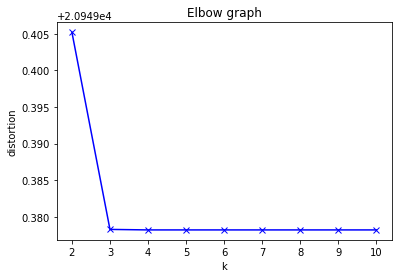

In [16]:
K=range(2,11)

plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
models = {}
distortions = []
for k in K:
    s3_client = boto3.client('s3')
    key = 'kmeans_acloudguru/' + output_folder +'/'+ 'cluster--------k'+ str(k) + '/output/model.tar.gz'
    s3_client.download_file(bucket, key, 'model.tar.gz')
    print("Model for k={} ({})".format(k, key))
    !tar -xvf model.tar.gz                       
    kmeans_model=mx.ndarray.load('model_algo-1')
    kmeans_numpy = kmeans_model[0].asnumpy()
    distortions.append(sum(np.min(cdist(final, kmeans_numpy, 'euclidean'), axis=1)) / final.shape[0])
    models[k] = kmeans_numpy
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('distortion')
plt.title('Elbow graph')
plt.show()